### Decision Tree

* It is a supervised algorithm and non parametric
* it is used for regression and classification both
* it is a tree like structure which is created by rules Rules are created out of data.

gini , entropy


entropy :if u divide a data into 2 group and take 2 samples from one of group then chances of getting two sample from
the same class

***
* if entropy of a variable is low than its importance will be high
***

entropy of target variable:

##### Can be used for Resume 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics # for  model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
os.chdir('E:\MachineLearning\data4oct')

In [3]:
os.listdir()

['bank.xlsx', 'cv.xlsx']

In [4]:
bank=pd.read_excel('bank.xlsx')

In [5]:
bank=pd.read_excel('bank.xlsx',sheet_name='bank')                         # if our desired data is not at the first sheet

In [6]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

#### Data Dictionery

please refer to excel sheet for this .

#### Target Variable:has the client subscribed a term deposit? (binary: 'yes','no')

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### EDA/Feature Engineering

### Univariate Analysis

In [9]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={'ed':'Count'},inplace=True)
    
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:'Percentage'},inplace=True)
    f2['Percentage']=(f2['Percentage']*100).round(2).astype(str)+"%"
    ff=pd.concat([f1,f2],axis=1)    
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print("value counts and %n ",ff)
    plt.figure(figsize=(10,8))
    sns.countplot(data=data,x=x)
    plt.show()

In [10]:
bank.dtypes[bank.dtypes=='object'].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
value counts and %n                  job Percentage
management     2566     22.99%
blue-collar    1944     17.42%
technician     1823     16.33%
admin.         1334     11.95%
services        923      8.27%
retired         778      6.97%
self-employed   405      3.63%
student         360      3.23%
unemployed      357       3.2%
entrepreneur    328      2.94%
housemaid       274      2.45%
unknown          70      0.63%


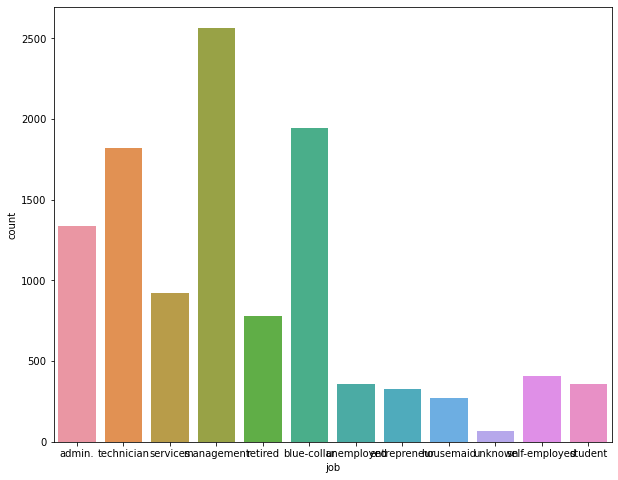

In [11]:
univariate_cat(data=bank,x='job')

since it is a categorical variable therefore creating dummies to convert it into numerical

We can combine the categories to reduce it into smaller no of categories

In [12]:
bank['job']=bank['job'].replace(['management','admin.'],'White-collar')
bank['job']=bank['job'].replace(['services','housemaid'],'Pink-collar')
bank['job']=bank['job'].replace(['retired','student','unemployed','unknown'],'Others')
bank['job']=bank['job'].replace(['self-employed','entrepreneur'],'self-depend')

Total missing values : 0

Total count of unique categories: 6

Unique categories :
['White-collar', 'technician', 'Pink-collar', 'Others', 'blue-collar', 'self-depend']
value counts and %n                 job Percentage
White-collar  3900     34.94%
blue-collar   1944     17.42%
technician    1823     16.33%
Others        1565     14.02%
Pink-collar   1197     10.72%
self-depend    733      6.57%


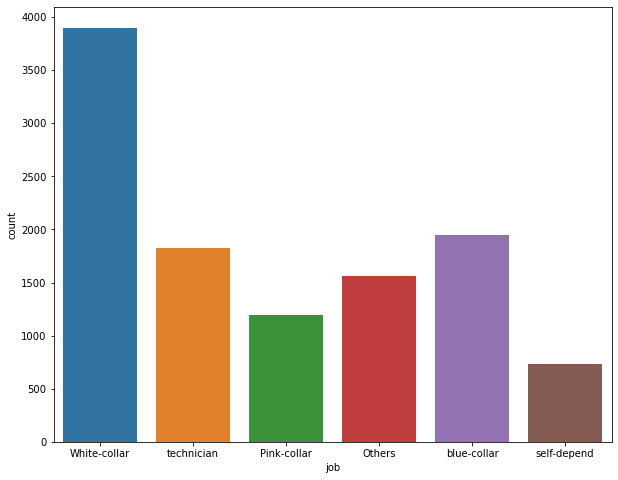

In [13]:
univariate_cat(data=bank,x='job')

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['married', 'single', 'divorced']
value counts and %n            marital Percentage
married      6351      56.9%
single       3518     31.52%
divorced     1293     11.58%


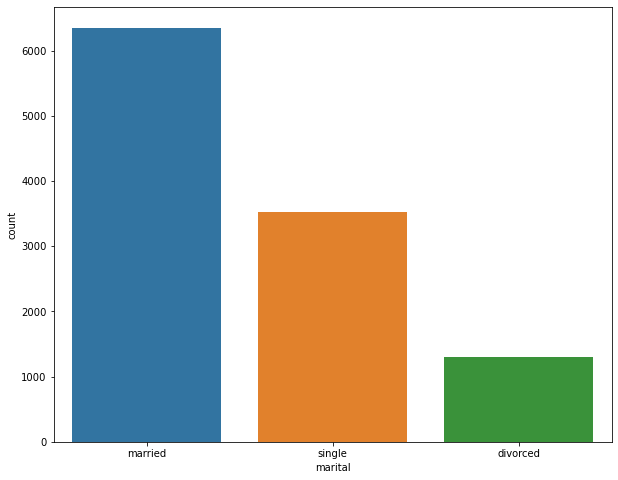

In [14]:
univariate_cat(data=bank,x='marital')

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['secondary', 'tertiary', 'primary', 'unknown']
value counts and %n             education Percentage
secondary       5476     49.06%
tertiary        3689     33.05%
primary         1500     13.44%
unknown          497      4.45%


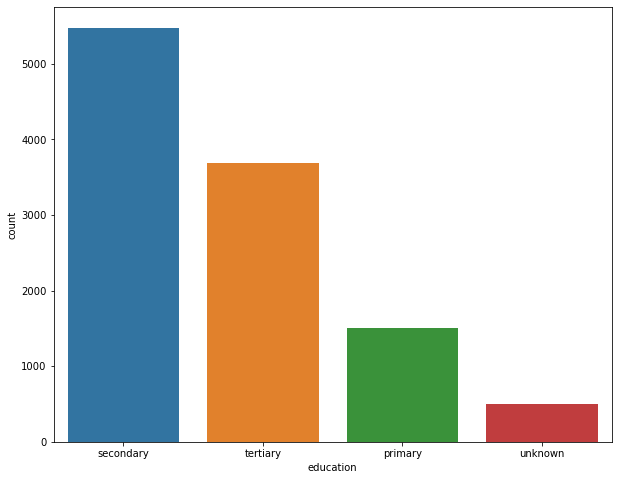

In [15]:
univariate_cat(data=bank,x='education')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
value counts and %n       default Percentage
no     10994     98.49%
yes      168      1.51%


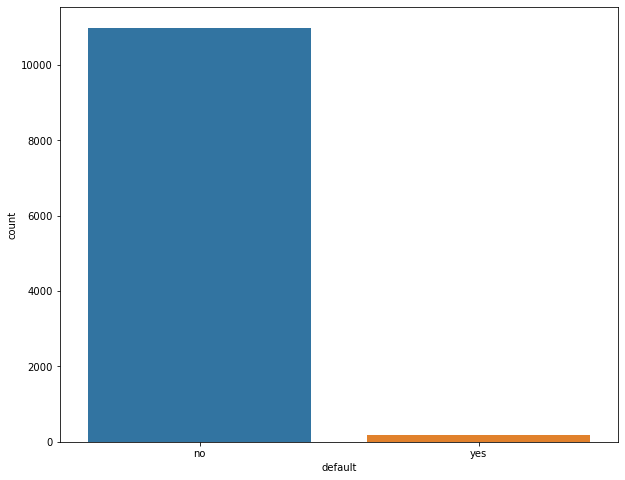

In [16]:
univariate_cat(data=bank,x='default')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
value counts and %n       loan Percentage
no   9702     86.92%
yes  1460     13.08%


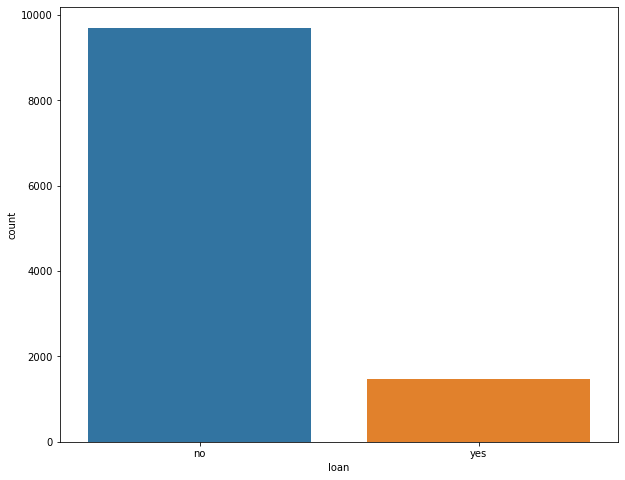

In [17]:
univariate_cat(data=bank,x='loan')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
value counts and %n       housing Percentage
no      5881     52.69%
yes     5281     47.31%


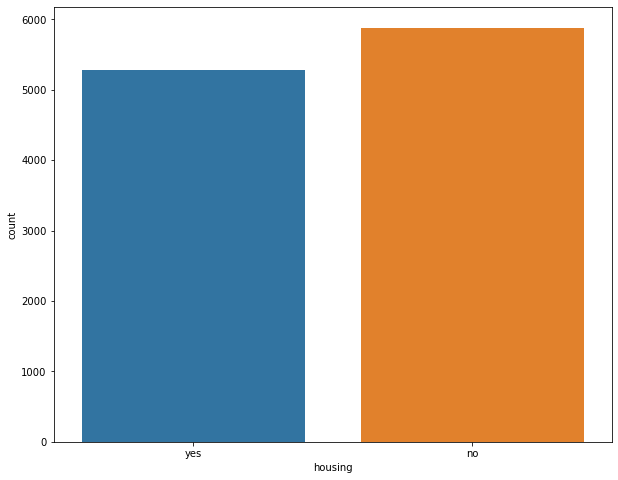

In [18]:
univariate_cat(data=bank,x='housing')

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['unknown', 'other', 'failure', 'success']
value counts and %n           poutcome Percentage
unknown      8326     74.59%
failure      1228      11.0%
success      1071       9.6%
other         537      4.81%


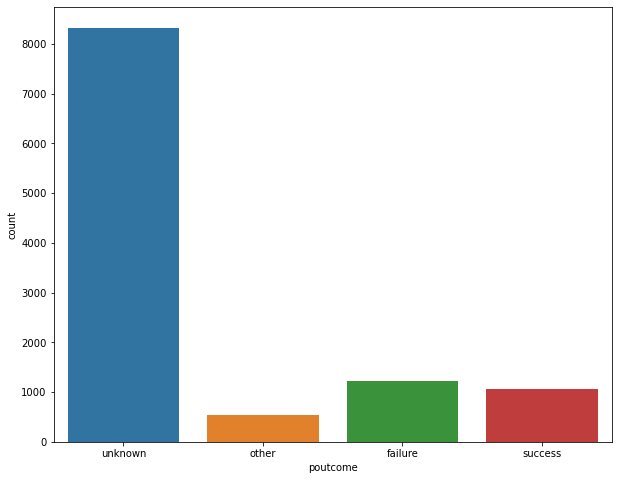

In [19]:
univariate_cat(data=bank,x='poutcome')

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['unknown', 'cellular', 'telephone']
value counts and %n             contact Percentage
cellular      8042     72.05%
unknown       2346     21.02%
telephone      774      6.93%


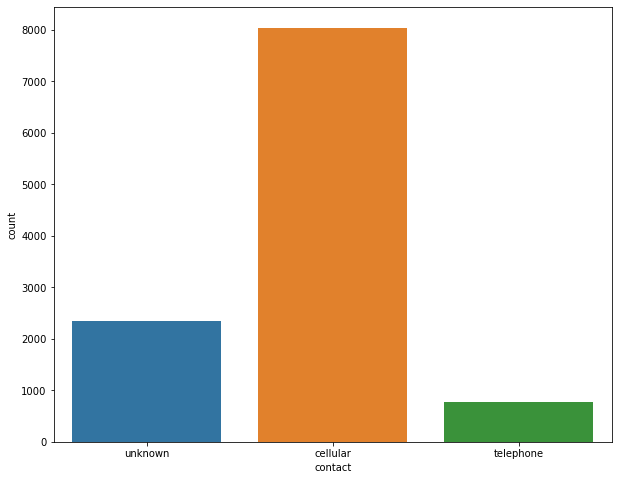

In [20]:
univariate_cat(data=bank,x='contact')

In [21]:
bank[bank['contact']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,White-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,White-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,Pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,White-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,55,Pink-collar,divorced,secondary,no,2166,yes,no,unknown,28,may,23,17,-1,0,unknown,no
11144,60,Others,married,secondary,no,0,yes,no,unknown,15,may,229,1,-1,0,unknown,no
11148,32,blue-collar,married,secondary,no,1,yes,no,unknown,8,may,102,1,-1,0,unknown,no
11151,40,White-collar,married,tertiary,no,917,yes,no,unknown,20,may,292,1,-1,0,unknown,no


In [22]:
bank[bank['contact']=='telephone']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
485,31,blue-collar,divorced,secondary,no,-277,yes,no,telephone,17,jul,1008,2,-1,0,unknown,yes
491,33,White-collar,married,secondary,no,0,yes,no,telephone,17,jul,1448,7,-1,0,unknown,yes
518,39,White-collar,married,tertiary,no,1423,yes,no,telephone,21,jul,733,3,-1,0,unknown,yes
522,42,Others,married,unknown,no,970,yes,no,telephone,21,jul,691,10,-1,0,unknown,yes
523,56,Pink-collar,married,primary,no,486,no,yes,telephone,21,jul,1877,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11066,28,technician,single,secondary,no,2000,no,no,telephone,3,feb,226,2,-1,0,unknown,no
11090,34,Pink-collar,single,secondary,no,2257,no,yes,telephone,30,jan,568,2,-1,0,unknown,no
11134,58,self-depend,married,tertiary,no,2596,no,no,telephone,18,nov,15,2,-1,0,unknown,no
11138,32,technician,married,secondary,no,235,yes,no,telephone,28,aug,688,6,-1,0,unknown,no


In [23]:
bank[bank['contact']=='cellular']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
367,28,blue-collar,single,secondary,no,-127,yes,no,cellular,4,jul,1044,3,-1,0,unknown,yes
368,55,blue-collar,married,secondary,no,49,yes,no,cellular,7,jul,494,4,-1,0,unknown,yes
369,51,technician,married,secondary,no,216,no,no,cellular,7,jul,615,2,-1,0,unknown,yes
370,39,technician,single,secondary,no,506,yes,no,cellular,7,jul,718,2,-1,0,unknown,yes
371,42,blue-collar,divorced,primary,no,213,yes,no,cellular,7,jul,434,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


since this data shows contact no has nothing to do with decision to take fd therefore droping this variable

In [24]:
bank.drop(columns=['contact'],inplace=True)

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
value counts and %n       month Percentage
may   2824      25.3%
aug   1519     13.61%
jul   1514     13.56%
jun   1222     10.95%
nov    943      8.45%
apr    923      8.27%
feb    776      6.95%
oct    392      3.51%
jan    344      3.08%
sep    319      2.86%
mar    276      2.47%
dec    110      0.99%


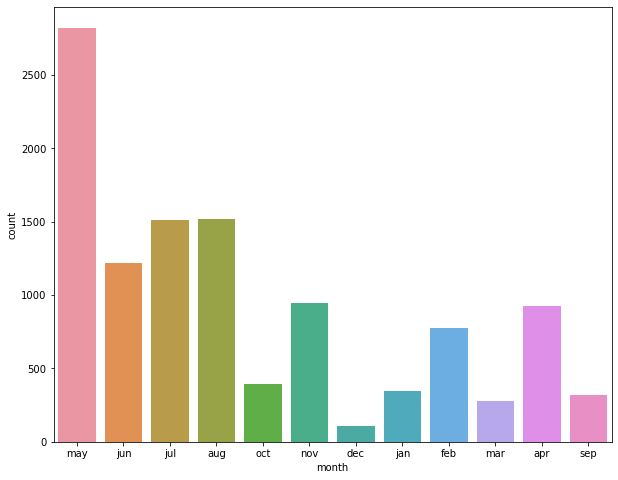

In [25]:
univariate_cat(data=bank,x='month')

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['unknown', 'other', 'failure', 'success']
value counts and %n           poutcome Percentage
unknown      8326     74.59%
failure      1228      11.0%
success      1071       9.6%
other         537      4.81%


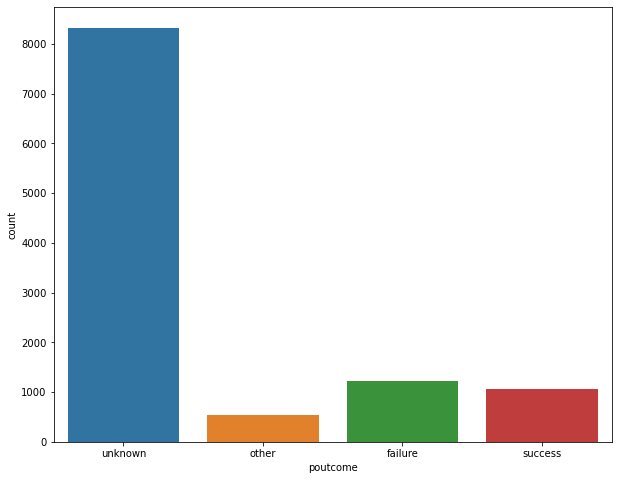

In [26]:
univariate_cat(data=bank,x='poutcome')

In [27]:
bank['poutcome']=bank['poutcome'].replace(['unknown','other'],'other')

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['other', 'failure', 'success']
value counts and %n           poutcome Percentage
other        8863      79.4%
failure      1228      11.0%
success      1071       9.6%


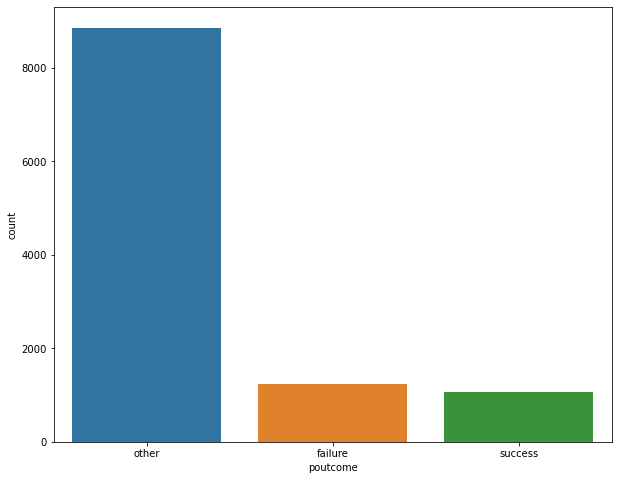

In [28]:
univariate_cat(data=bank,x='poutcome')

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
value counts and %n       deposit Percentage
no      5873     52.62%
yes     5289     47.38%


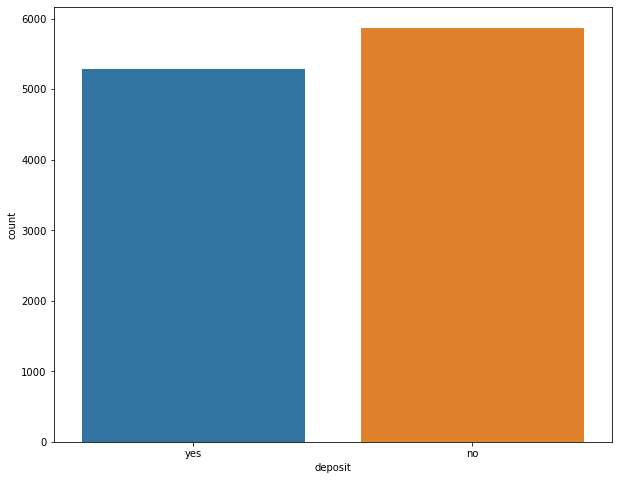

In [29]:
univariate_cat(data=bank,x='deposit')

In [30]:
bank['deposit']=bank['deposit'].map({'yes':1,'no':0})

In [31]:
bank['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [32]:
bank['deposit'].dtypes

dtype('int64')

#### numerical Variables

In [33]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [34]:
bank.dtypes[bank.dtypes!='object'].index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

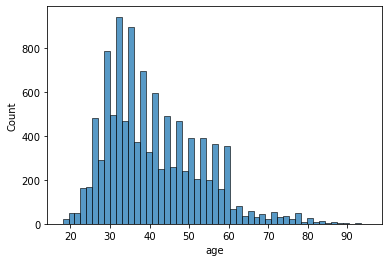

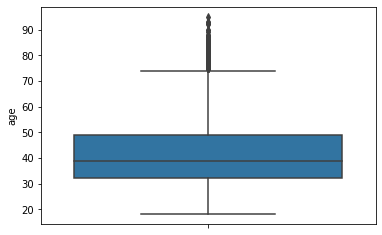

{'missing': 0,
 'min': 18,
 'max': 95,
 'mean': 41.23,
 'var': 141.93,
 'std': 11.91,
 'range': 77,
 'q1': 32.0,
 'q2': 39.0,
 'q3': 49.0,
 'skewness': 0.86,
 'kurtosis': 0.62}

In [35]:
univariate_num(data=bank,x='age')

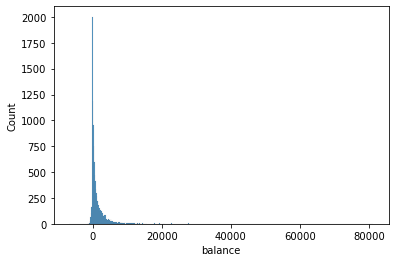

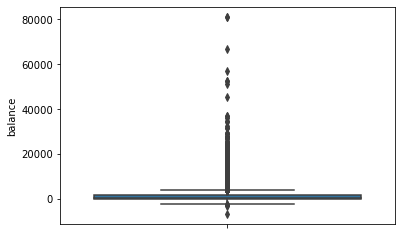

{'missing': 0,
 'min': -6847,
 'max': 81204,
 'mean': 1528.54,
 'var': 10403291.12,
 'std': 3225.41,
 'range': 88051,
 'q1': 122.0,
 'q2': 550.0,
 'q3': 1708.0,
 'skewness': 8.22,
 'kurtosis': 126.86}

In [36]:
univariate_num(data=bank,x='balance')

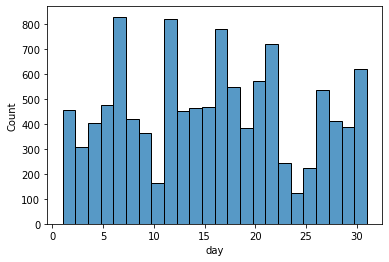

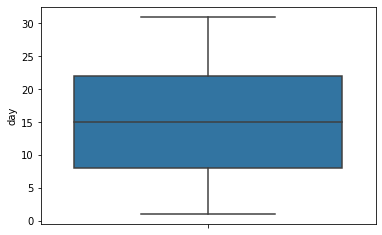

{'missing': 0,
 'min': 1,
 'max': 31,
 'mean': 15.66,
 'var': 70.91,
 'std': 8.42,
 'range': 30,
 'q1': 8.0,
 'q2': 15.0,
 'q3': 22.0,
 'skewness': 0.11,
 'kurtosis': -1.06}

In [37]:
univariate_num(data=bank,x='day')

In [10]:
bank.drop(columns=['day'],inplace=True)

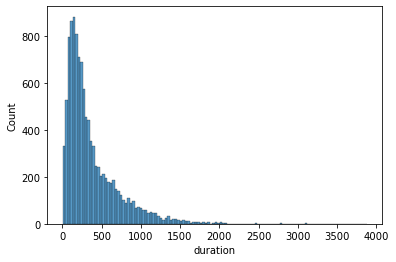

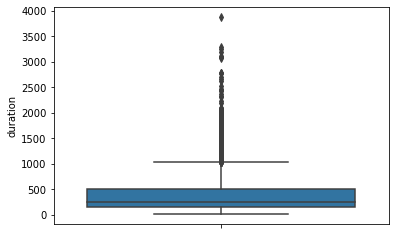

{'missing': 0,
 'min': 2,
 'max': 3881,
 'mean': 371.99,
 'var': 120498.12,
 'std': 347.13,
 'range': 3879,
 'q1': 138.0,
 'q2': 255.0,
 'q3': 496.0,
 'skewness': 2.14,
 'kurtosis': 7.3}

In [39]:
univariate_num(data=bank,x='duration')

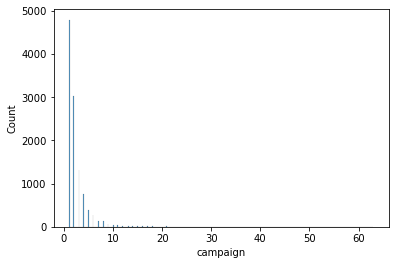

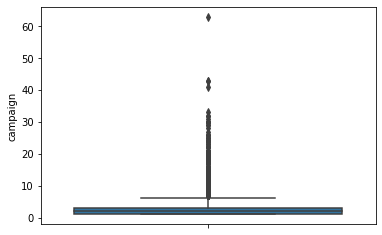

{'missing': 0,
 'min': 1,
 'max': 63,
 'mean': 2.51,
 'var': 7.41,
 'std': 2.72,
 'range': 62,
 'q1': 1.0,
 'q2': 2.0,
 'q3': 3.0,
 'skewness': 5.55,
 'kurtosis': 57.39}

In [40]:
univariate_num(data=bank,x='campaign')

<AxesSubplot:xlabel='campaign', ylabel='count'>

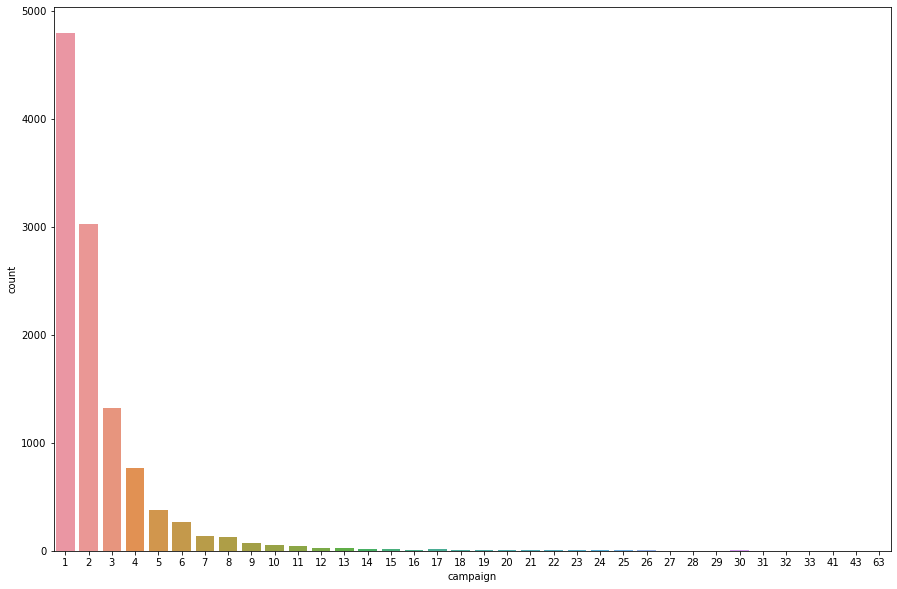

In [41]:
plt.figure(figsize=(15,10)) #  width and height in figsize
sns.countplot(data=bank,x='campaign')

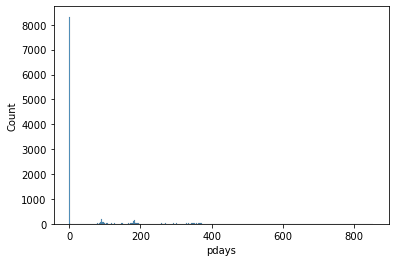

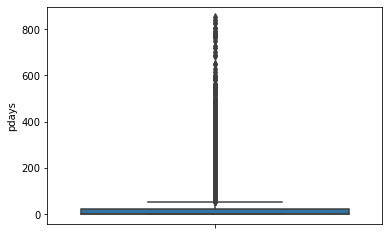

{'missing': 0,
 'min': -1,
 'max': 854,
 'mean': 51.33,
 'var': 11828.36,
 'std': 108.76,
 'range': 855,
 'q1': -1.0,
 'q2': -1.0,
 'q3': 20.75,
 'skewness': 2.45,
 'kurtosis': 6.84}

In [42]:
univariate_num(data=bank,x='pdays')

<AxesSubplot:xlabel='pdays', ylabel='count'>

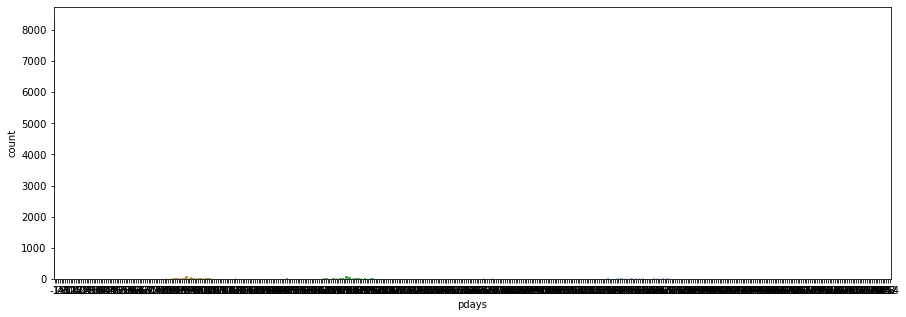

In [43]:
plt.figure(figsize=(15,5)) #  width and height in figsize
sns.countplot(data=bank,x='pdays')

In [44]:
# for changing the variable importance (if it seems important in terms of bussiness ) then we can reciprocal its observation like 
# done here
bank.loc[bank['pdays']==-1,'pdays']=999

bank['recent_pdays']=1/bank['pdays']

bank.drop(columns=['pdays'],inplace=True)


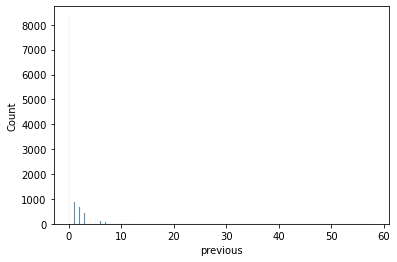

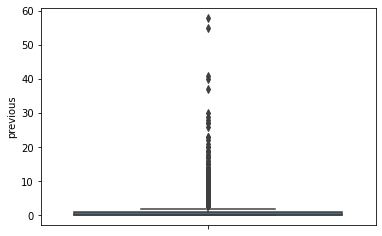

{'missing': 0,
 'min': 0,
 'max': 58,
 'mean': 0.83,
 'var': 5.25,
 'std': 2.29,
 'range': 58,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 1.0,
 'skewness': 7.34,
 'kurtosis': 106.2}

In [45]:
univariate_num(data=bank,x='previous')

#### Bivariate Analysis

* cat-cat
* cat-num
* num-num

cat-cat

In [46]:
pd.crosstab(bank['job'],bank['deposit'])

deposit,0,1
job,,
Others,544,1021
Pink-collar,719,478
White-collar,1968,1932
blue-collar,1236,708
self-depend,423,310
technician,983,840


In [47]:
pd.crosstab(bank['job'],bank['deposit'],normalize='index') # row-wise

deposit,0,1
job,,
Others,0.347604,0.652396
Pink-collar,0.600668,0.399332
White-collar,0.504615,0.495385
blue-collar,0.635802,0.364198
self-depend,0.577080,0.422920
technician,0.539221,0.460779


In [48]:
pd.crosstab(bank['marital'],bank['deposit'],normalize='index')

deposit,0,1
marital,,
divorced,0.518948,0.481052
married,0.566210,0.433790
single,0.456509,0.543491


In [49]:
pd.crosstab(bank['education'],bank['deposit'],normalize='index')

deposit,0,1
education,,
primary,0.606000,0.394000
secondary,0.552593,0.447407
tertiary,0.458932,0.541068
unknown,0.492958,0.507042


In [50]:
pd.crosstab(bank['default'],bank['deposit'],normalize='index')

deposit,0,1
default,,
no,0.523649,0.476351
yes,0.690476,0.309524


In [51]:
pd.crosstab(bank['housing'],bank['deposit'],normalize='index')

deposit,0,1
housing,,
no,0.429689,0.570311
yes,0.633592,0.366408


In [52]:
pd.crosstab(bank['loan'],bank['deposit'],normalize='index')

deposit,0,1
loan,,
no,0.504741,0.495259
yes,0.668493,0.331507



10-10-22


#Recap
Bank deposit
Target Variable: Who will do FD

In [53]:

pd.crosstab(bank['month'],bank['deposit'])

deposit,0,1
month,,
apr,346,577
aug,831,688
dec,10,100
feb,335,441
jan,202,142
jul,887,627
jun,676,546
mar,28,248
may,1899,925


In [54]:
pd.crosstab(bank['month'],bank['deposit'],normalize='index')

deposit,0,1
month,,
apr,0.374865,0.625135
aug,0.547070,0.452930
dec,0.090909,0.909091
feb,0.431701,0.568299
jan,0.587209,0.412791
jul,0.585865,0.414135
jun,0.553191,0.446809
mar,0.101449,0.898551
may,0.672450,0.327550


In [55]:
pd.crosstab(bank['month'],bank['deposit'],normalize='columns')

deposit,0,1
month,,
apr,0.058914,0.109094
aug,0.141495,0.130081
dec,0.001703,0.018907
feb,0.057041,0.083381
jan,0.034395,0.026848
jul,0.151030,0.118548
jun,0.115103,0.103233
mar,0.004768,0.046890
may,0.323344,0.174891


In [56]:
pd.crosstab(bank['month'],bank['deposit'],normalize='all')

deposit,0,1
month,,
apr,0.030998,0.051693
aug,0.074449,0.061638
dec,0.000896,0.008959
feb,0.030013,0.039509
jan,0.018097,0.012722
jul,0.079466,0.056173
jun,0.060563,0.048916
mar,0.002509,0.022218
may,0.170131,0.082870


In [57]:
pd.crosstab(bank['poutcome'],bank['deposit'])

deposit,0,1
poutcome,,
failure,610,618
other,5170,3693
success,93,978



##### cat-num

In [58]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'deposit', 'recent_pdays'],
      dtype='object')

In [59]:
bank.groupby(['deposit']).agg({'age':['min','mean','median','max','std','count']})

age                                       
        min       mean median max        std count
deposit                                           
0        18  40.837391   39.0  89  10.264815  5873
1        18  41.670070   38.0  95  13.497781  5289

<AxesSubplot:xlabel='deposit'>

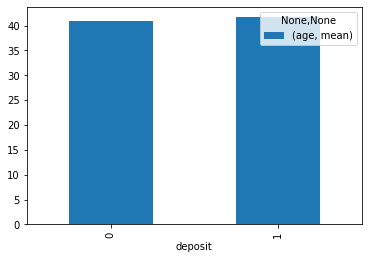

In [60]:
bank.groupby(['deposit']).agg({'age':['mean']}).plot(kind='bar')

means age variable is of our concern

In [61]:
from scipy import stats

***
* Null Hypo:avg_age(non deposit)=avg_age_(deposit)
* Alter Hypo:avg_age(non deposit)!=avg_age_(deposit)
* Test:two sample t test
* CI:95%
* Alpha:0.05
* Decision Rule:
    * if p value>=Alpha:Null is accepted
    * p value<Alpha:Null is rejected and alternative is accepted
***

In [62]:
dp=bank[bank['deposit']==1]
ndp=bank[bank['deposit']==0]

In [63]:
stats.ttest_ind(dp['age'],ndp['age'])

Ttest_indResult(statistic=3.6892130272779955, pvalue=0.00022601800590796526)

since pvalue is less than alpha therefore null hypo is rejected
and the avg age of both the group is having different average age therefore it is of Use in this case

In [64]:
bank.groupby(['deposit']).agg({'balance':['min','mean','median','max','std','count']})

balance                                              
            min         mean median    max          std count
deposit                                                      
0         -6847  1280.227141  414.0  66653  2933.411934  5873
1         -3058  1804.267915  733.0  81204  3501.104777  5289

In [65]:
stats.ttest_ind(dp['balance'],ndp['balance'])

Ttest_indResult(statistic=8.598842126021864, pvalue=9.126568254859532e-18)

In [66]:
bank[bank['balance']<=0]

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,poutcome,deposit,recent_pdays
5,42,White-collar,single,tertiary,no,0,yes,yes,may,562,2,0,other,1,0.001001
17,49,Pink-collar,married,secondary,no,-8,yes,no,may,1119,1,0,other,1,0.001001
23,43,blue-collar,married,primary,no,-192,yes,no,may,1120,2,0,other,1,0.001001
30,32,blue-collar,married,secondary,yes,-1,yes,no,may,653,1,0,other,1,0.001001
42,45,self-depend,divorced,tertiary,no,-395,yes,no,may,470,1,0,other,1,0.001001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,60,Others,divorced,tertiary,no,-134,no,no,may,243,1,4,failure,0,0.003690
11147,44,Others,married,secondary,no,0,no,no,nov,175,4,0,other,0,0.001001
11156,34,blue-collar,single,secondary,no,-72,yes,no,jul,273,5,0,other,0,0.001001
11160,43,technician,married,secondary,no,0,no,yes,may,9,2,5,failure,0,0.005814


since balance has nothing to do with deposit therefore it is not as important

In [67]:
bank.groupby(['deposit']).agg({'duration':['min','mean','median','max','std','count']})

duration                                           
             min        mean median   max         std count
deposit                                                    
0              2  223.130257  163.0  3284  208.577530  5873
1              8  537.294574  426.0  3881  392.525262  5289

In [68]:
stats.ttest_ind(dp['duration'],ndp['duration'])

Ttest_indResult(statistic=53.51796190607506, pvalue=0.0)

test show it is of no importance but we know that it is of atmost importance

In [69]:
#Var    : T test   : Feature selection method : Model variable impo
# Balance : imp      : not                      : imp

[]

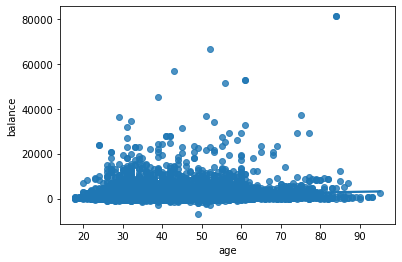

In [70]:
# a straight line parallel to x axis show no relation between the two variable of concern
sns.regplot(data=bank, x='age',y='balance')
plt.plot()

[]

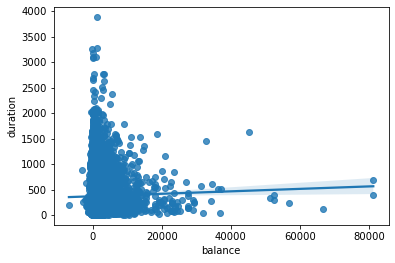

In [71]:
sns.regplot(data=bank, y='duration',x='balance')
plt.plot()

#### Missing Value Treatment

In [72]:
bank.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
month           0
duration        0
campaign        0
previous        0
poutcome        0
deposit         0
recent_pdays    0
dtype: int64

***
* There is no missing value
***

##### Outlier Treatment

<AxesSubplot:ylabel='age'>

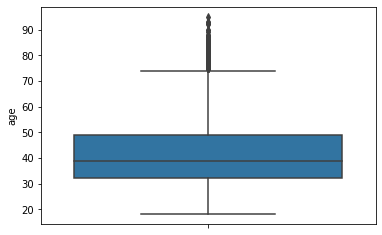

In [73]:
sns.boxplot(data=bank,y='age')

In [74]:
q1=bank['age'].quantile(.25)
q3=bank['age'].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank['age']=np.where(bank['age']>=upper_cap,upper_cap,bank['age'])
bank['age']=np.where(bank['age']<=lower_cap,lower_cap,bank['age'])


<AxesSubplot:ylabel='age'>

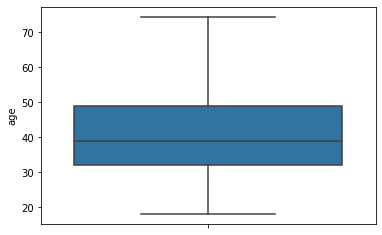

In [75]:
sns.boxplot(data=bank,y='age')

<AxesSubplot:ylabel='balance'>

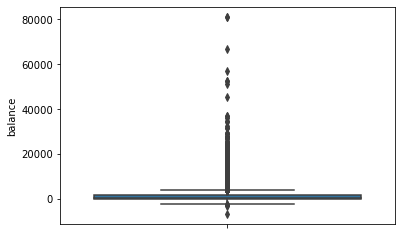

In [76]:
sns.boxplot(data=bank,y='balance')

In [77]:
var='balance'
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap,upper_cap,bank[var])
bank[var]=np.where(bank[var]<=lower_cap,lower_cap,bank[var])


<AxesSubplot:ylabel='balance'>

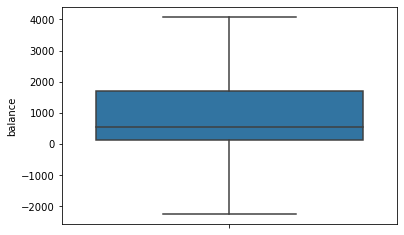

In [78]:
sns.boxplot(data=bank,y='balance')

<AxesSubplot:ylabel='recent_pdays'>

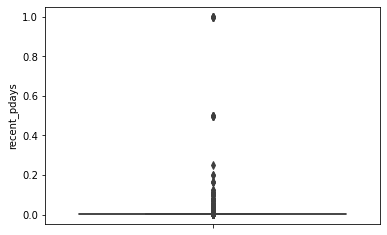

In [79]:
sns.boxplot(data=bank,y='recent_pdays')

In [80]:
var='recent_pdays'
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap,upper_cap,bank[var])
bank[var]=np.where(bank[var]<=lower_cap,lower_cap,bank[var])

<AxesSubplot:ylabel='recent_pdays'>

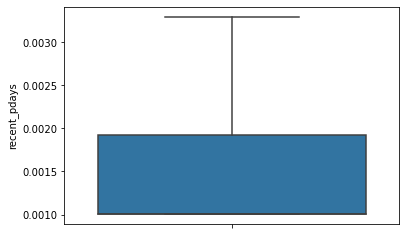

In [81]:
sns.boxplot(data=bank,y='recent_pdays')

##### Converting non-numerical to numerical

#### Dummies

In [11]:
bank1=pd.get_dummies(data=bank,drop_first=True)

In [12]:
bank1.head(4)

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,1042,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,56,45,1467,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1270,1389,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,55,2476,579,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [13]:
bank.head(4).shape

(4, 16)

In [14]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   duration             11162 non-null  int64
 3   campaign             11162 non-null  int64
 4   pdays                11162 non-null  int64
 5   previous             11162 non-null  int64
 6   job_blue-collar      11162 non-null  uint8
 7   job_entrepreneur     11162 non-null  uint8
 8   job_housemaid        11162 non-null  uint8
 9   job_management       11162 non-null  uint8
 10  job_retired          11162 non-null  uint8
 11  job_self-employed    11162 non-null  uint8
 12  job_services         11162 non-null  uint8
 13  job_student          11162 non-null  uint8
 14  job_technician       11162 non-null  uint8
 15  job_unemployed       11162 non-null  uint8
 16  job_unknown          1

### Model Development

In [215]:
x=bank1.drop(columns=['deposit'])
y=bank1['deposit']

In [216]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

#### first randomly runing model without tuning the hyperparameter

In [217]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [218]:
print('Train Accuracy:',round(dt.score(x_train,y_train),2))
print('Test Accuracy:',round(dt.score(x_test,y_test),2))

Train Accuracy: 1.0
Test Accuracy: 0.76


As it is overfitting therefore going to control it using 
gridserchcv
crossvalidation ie CV

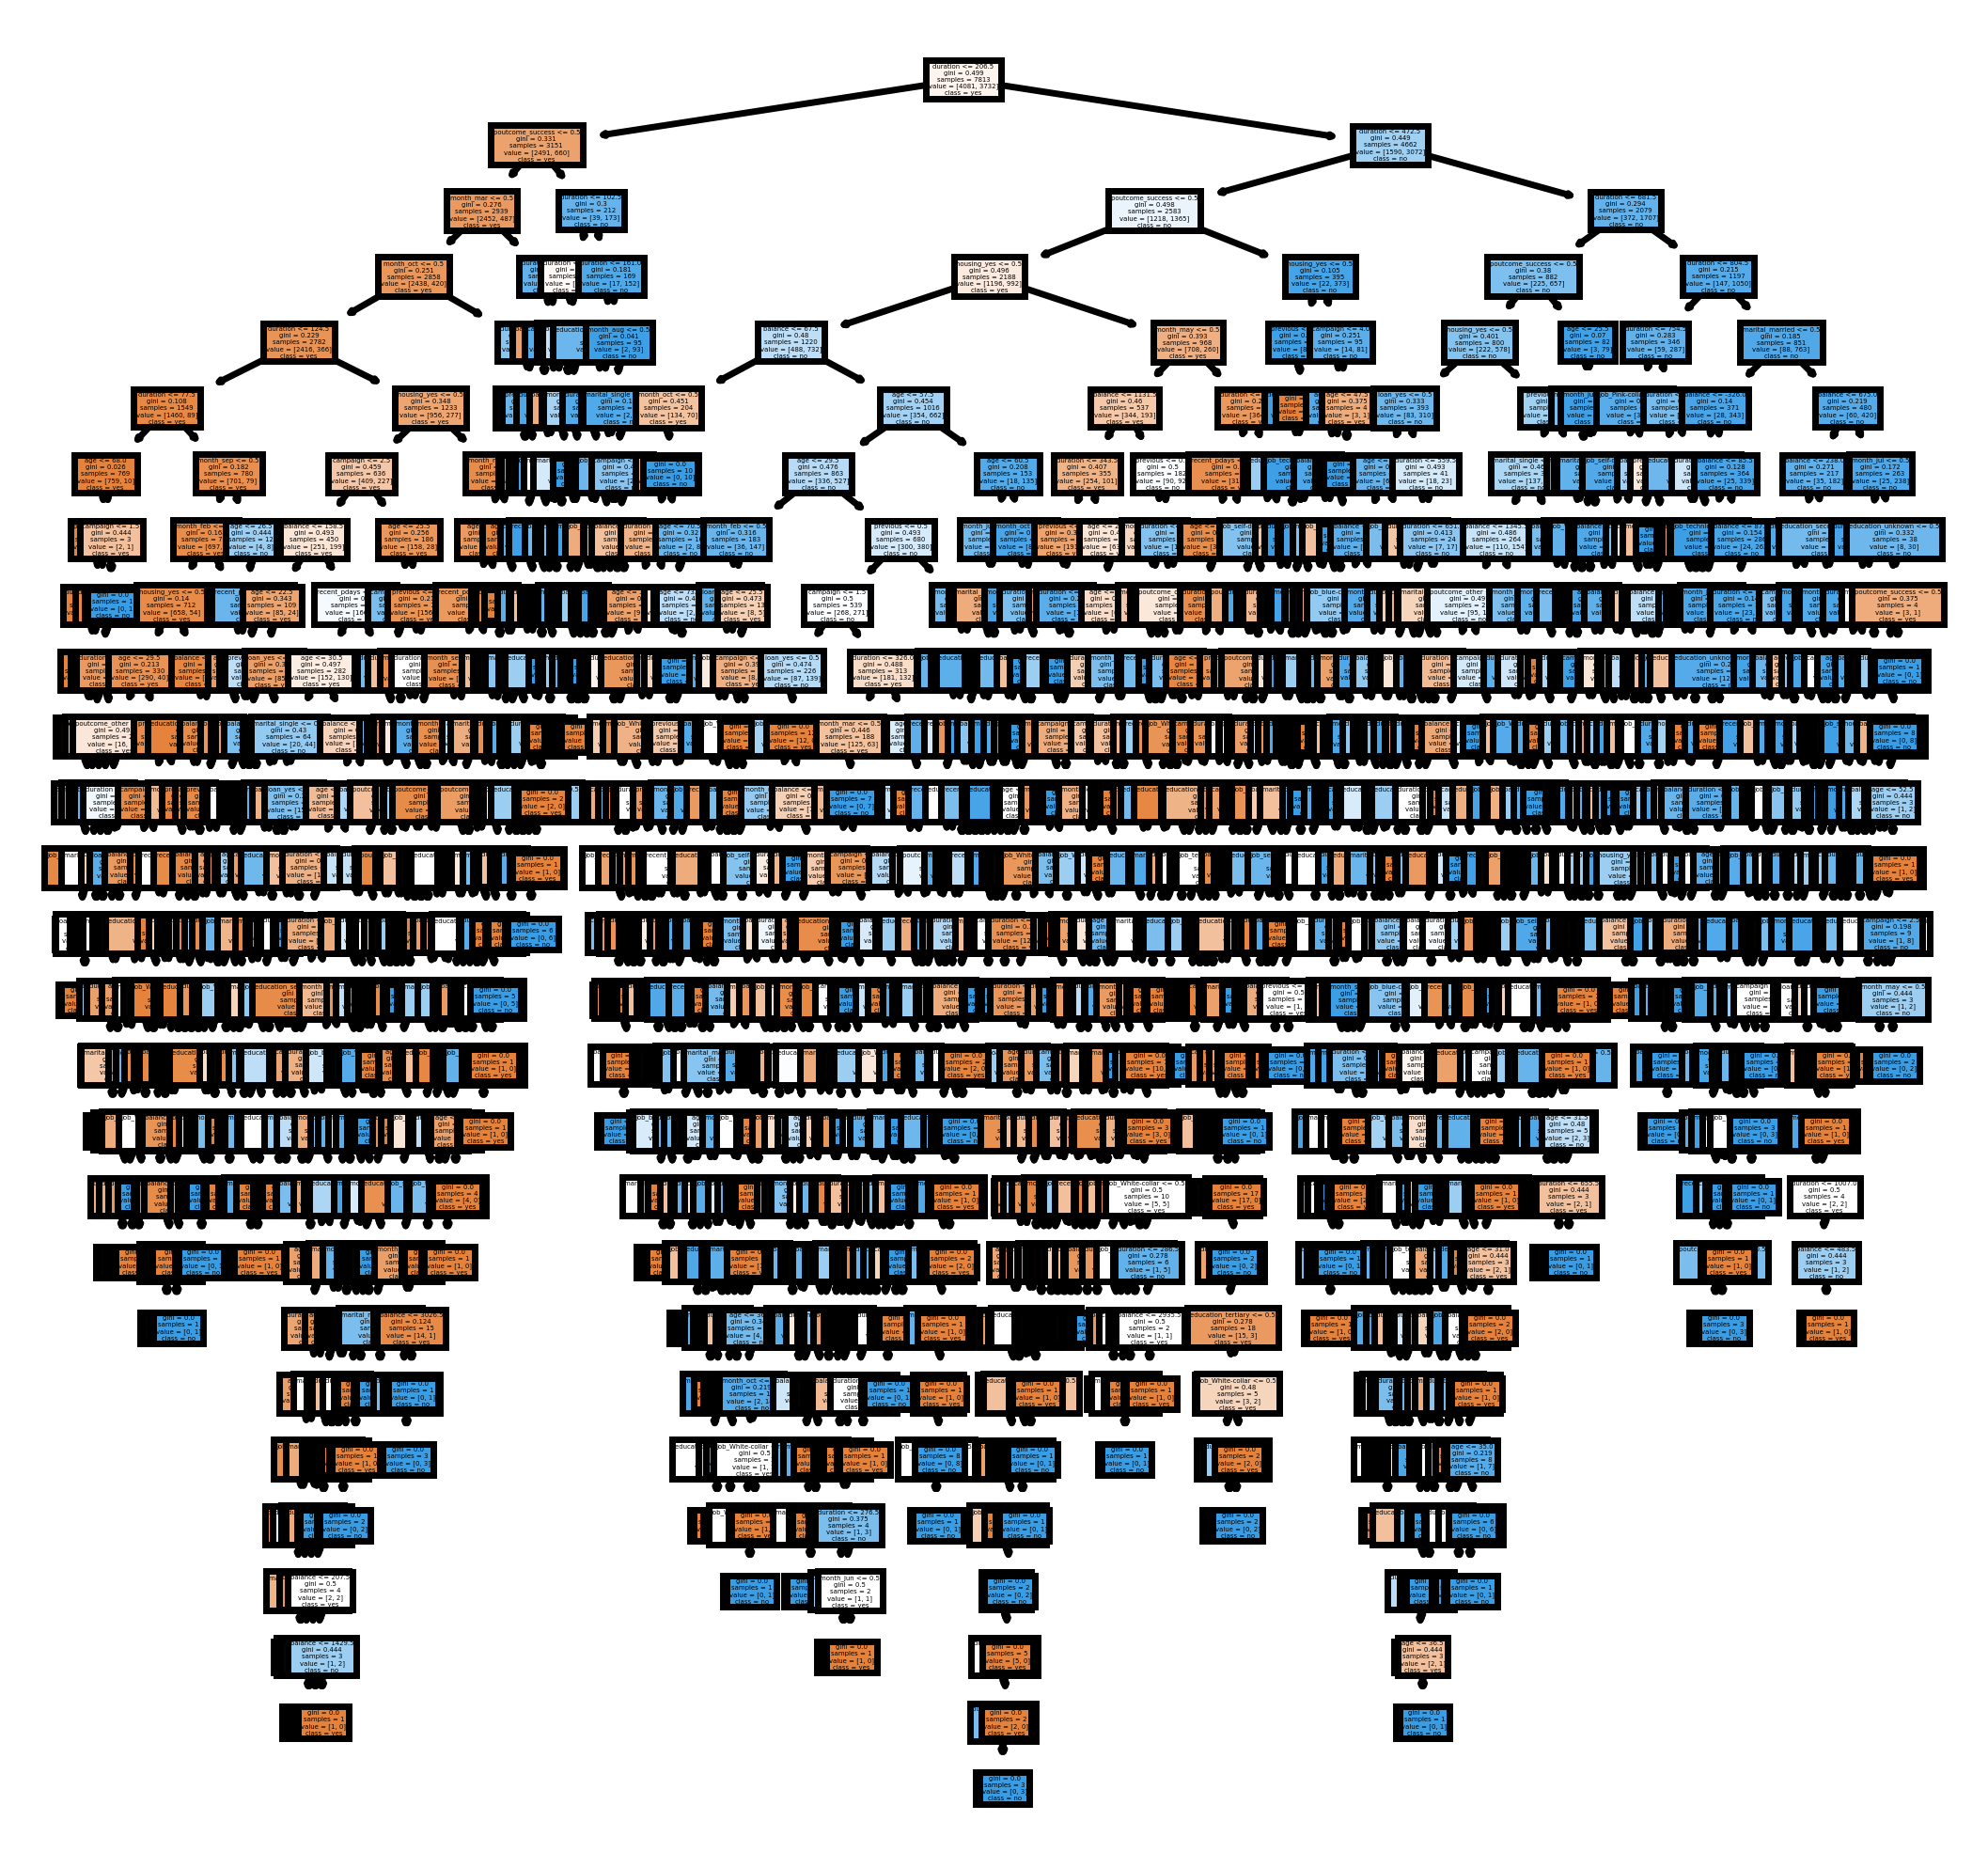

In [89]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=['yes','no']
# Setting dpi= 300 to make image clearer than default
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5), dpi=500)

dt_plot=plot_tree(dt,
                 feature_names=fn,
                 class_names=cn,
                 filled=True);

***
* Our model is overfitting as train results are far better than test
* To avoid overfitting: make model simple(control the parameters) or do Cross Validation
***

In [219]:
dt1=DecisionTreeClassifier(min_samples_split=150)
dt1.fit(x_train,y_train)
print('Train Accuracy:',str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 83.8%
Test Accuracy: 81.10000000000001%


In [220]:
dt1=DecisionTreeClassifier(min_samples_leaf=50)
dt1.fit(x_train,y_train)
print('Train Accuracy:',str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 82.89999999999999%
Test Accuracy: 81.10000000000001%


In [221]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train,y_train)
print('Train Accuracy:',str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 100.0%
Test Accuracy: 75.9%


In [222]:
dt1=DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train,y_train)
print('Train Accuracy:',str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 100.0%
Test Accuracy: 75.5%


#### Grid Search and Random Search

#### Grid Search:Parameter tuning

max_depth=[]

In [223]:
from sklearn.model_selection import GridSearchCV

params={
    'criterion':['gini','entropy'],
    'max_depth':[5,7,9,10,11],
    'min_samples_split':[10,15,20,50,100,200,250],
    'min_samples_leaf':[5,10,15,20,50,80,100]}
dtg=DecisionTreeClassifier()
    
gd_search=GridSearchCV(estimator=dtg,param_grid=params,cv=10,n_jobs=-1,verbose=2)

gd_search.fit(x_train,y_train)
    

Fitting 10 folds for each of 490 candidates, totalling 4900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]},
             verbose=2)

In [1]:
# k-fold cross validation:it is a technique to avoid overfitting
# cv: Cross Validation =10
# for 10000 records it will divide into 10 parts since cv is 10
#     10000:1000*10


In [225]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 200}

In [226]:
gd_search.best_score_

0.809932508325938

In [227]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=200)

In [228]:
gd_search.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=200)

In [229]:
gd_search

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 10, 11],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 80, 100],
                         'min_samples_split': [10, 15, 20, 50, 100, 200, 250]},
             verbose=2)

In [230]:
pd.DataFrame(gd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076452,0.030196,0.006396,0.002288,gini,5,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.814578,...,0.798976,0.774648,0.778489,0.822023,0.811780,0.802817,0.797695,0.798796,0.014308,279
1,0.042873,0.002425,0.005397,0.001684,gini,5,5,15,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.813299,...,0.798976,0.773367,0.777209,0.819462,0.811780,0.802817,0.797695,0.798156,0.014174,309
2,0.096043,0.019381,0.020487,0.012485,gini,5,5,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.814578,...,0.797695,0.773367,0.777209,0.819462,0.811780,0.804097,0.797695,0.798412,0.014351,304
3,0.047170,0.012063,0.004297,0.000640,gini,5,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.814578,...,0.796415,0.774648,0.777209,0.818182,0.810499,0.804097,0.795134,0.797772,0.013873,332
4,0.043474,0.006420,0.008494,0.010222,gini,5,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.815857,...,0.797695,0.775928,0.778489,0.819462,0.811780,0.800256,0.795134,0.798156,0.013897,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.053167,0.001400,0.003998,0.000446,entropy,11,100,20,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.813299,...,0.805378,0.792574,0.783611,0.833547,0.802817,0.798976,0.796415,0.801741,0.013008,175
486,0.054867,0.002771,0.004098,0.000300,entropy,11,100,50,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.813299,...,0.805378,0.792574,0.783611,0.833547,0.802817,0.798976,0.796415,0.801741,0.013008,175
487,0.055267,0.004169,0.004097,0.000301,entropy,11,100,100,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.813299,...,0.805378,0.792574,0.783611,0.833547,0.802817,0.798976,0.796415,0.801741,0.013008,175
488,0.053666,0.001846,0.004698,0.001486,entropy,11,100,200,"{'criterion': 'entropy', 'max_depth': 11, 'min...",0.813299,...,0.805378,0.792574,0.783611,0.833547,0.802817,0.798976,0.796415,0.801741,0.013008,175


In [103]:
cv_res=pd.DataFrame(gd_search.cv_results_)
cv_res.to_excel("cv.xlsx")

In [104]:
os.getcwd()

'E:\\MachineLearning\\data4oct'

In [231]:
dt_f=DecisionTreeClassifier(criterion='gini',max_depth=11,
                           min_samples_leaf=5,
                           min_samples_split=200)
dt_f.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=200)

mdt_f=DecisionTreeClassifier(criterion='entropy',max_depth=11,
                           min_samples_leaf=5,
                           min_samples_split=100)
mdt_f.fit(x_train,y_train)

print('Train Accuracy:',str(round(mdt_f.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(mdt_f.score(x_test,y_test),3)*100)+str('%'))

In [232]:
print('Train Accuracy:',str(round(dt_f.score(x_train,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt_f.score(x_test,y_test),3)*100)+str('%'))

Train Accuracy: 82.89999999999999%
Test Accuracy: 80.60000000000001%


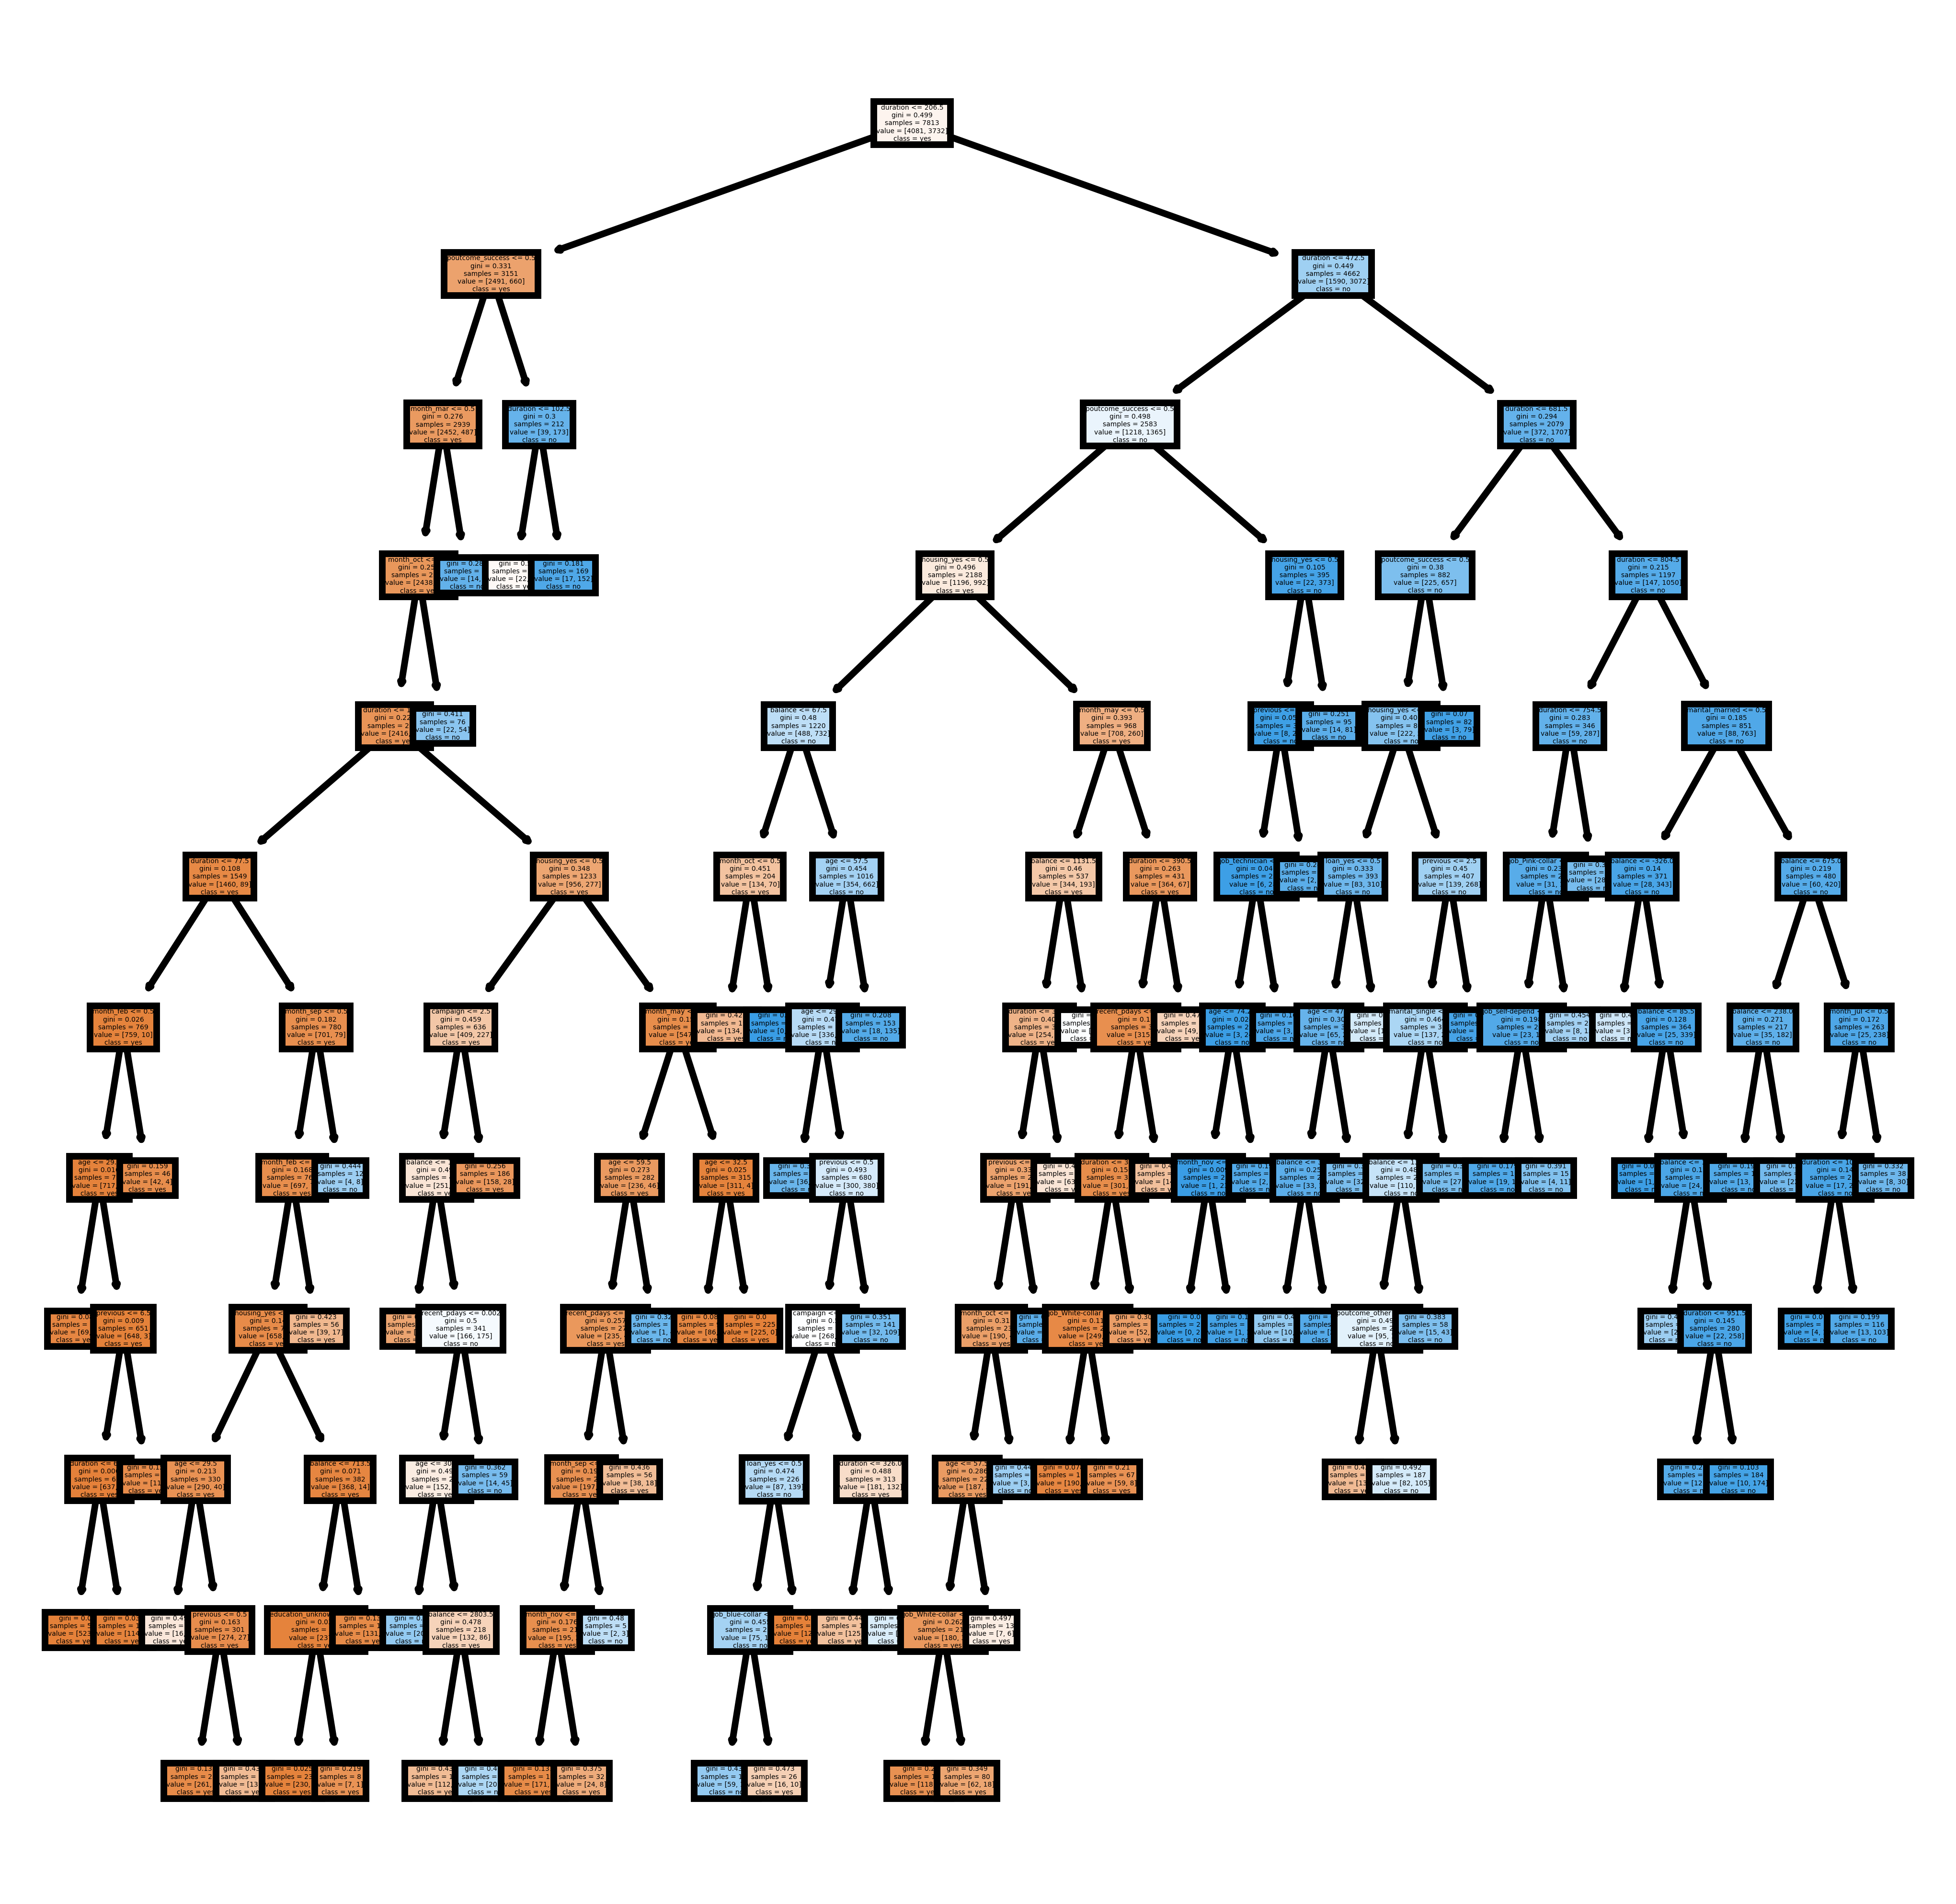

In [233]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=['yes','no']
# Setting dpi= 300 to make image clearer than default
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5), dpi=1000)

dt_plot=plot_tree(dt_f,
                 feature_names=fn,
                 class_names=cn,
                 filled=True);

rules=tree.export_text(df_f,feature_names=x_train.columns_to_list)

#### Feature Importance

In [234]:
dt_f.feature_importances_

array([3.01435741e-02, 3.89640715e-02, 5.30151087e-01, 1.60388608e-02,
       1.52605709e-02, 7.65195276e-03, 1.14957059e-03, 9.37806628e-04,
       2.06897865e-03, 3.87244441e-04, 1.73866542e-04, 5.11326705e-04,
       2.26725327e-03, 0.00000000e+00, 0.00000000e+00, 9.68580304e-05,
       0.00000000e+00, 8.76289874e-02, 7.14200198e-03, 0.00000000e+00,
       0.00000000e+00, 2.94847429e-03, 0.00000000e+00, 5.89923594e-04,
       0.00000000e+00, 3.63021856e-02, 1.32605039e-02, 9.21568025e-04,
       3.13256425e-02, 5.11120972e-03, 1.03722284e-03, 1.67929258e-01])

In [235]:
feat_imp=pd.DataFrame({'Variable':x_train.columns,
             'Imp':dt_f.feature_importances_}).sort_values(by='Imp',ascending=False)
feat_imp

,Variable,Imp
2,duration,0.530151
31,poutcome_success,0.167929
17,housing_yes,0.087629
1,balance,0.038964
25,month_mar,0.036302
28,month_oct,0.031326
0,age,0.030144
3,campaign,0.016039
4,previous,0.015261
26,month_may,0.013261


In [236]:
feat_imp

,Variable,Imp
2,duration,0.530151
31,poutcome_success,0.167929
17,housing_yes,0.087629
1,balance,0.038964
25,month_mar,0.036302
28,month_oct,0.031326
0,age,0.030144
3,campaign,0.016039
4,previous,0.015261
26,month_may,0.013261


<AxesSubplot:xlabel='Variable', ylabel='Imp'>

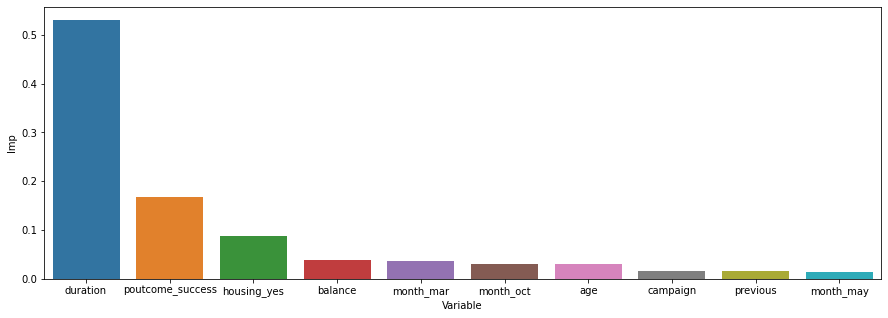

In [237]:
plt.figure(figsize=(15,5))
sns.barplot(data=feat_imp.head(10),x='Variable',y='Imp')

In [238]:
feat_imp[feat_imp['Imp']>=0.01]

,Variable,Imp
2,duration,0.530151
31,poutcome_success,0.167929
17,housing_yes,0.087629
1,balance,0.038964
25,month_mar,0.036302
28,month_oct,0.031326
0,age,0.030144
3,campaign,0.016039
4,previous,0.015261
26,month_may,0.013261


In [239]:
feat_imp[feat_imp['Imp']>=0.01]['Variable'].unique()

array(['duration', 'poutcome_success', 'housing_yes', 'balance',
       'month_mar', 'month_oct', 'age', 'campaign', 'previous',
       'month_may'], dtype=object)

In [240]:
x_train1=x_train[['duration', 'poutcome_success', 'housing_yes', 'balance',
       'month_mar', 'month_oct', 'age', 'campaign', 'previous',
       'month_may']]
x_test1=x_test[['duration', 'poutcome_success', 'housing_yes', 'balance',
       'month_mar', 'month_oct', 'age', 'campaign', 'previous',
       'month_may']]

In [241]:
dt_f=DecisionTreeClassifier(criterion='gini',max_depth=11,
                           min_samples_leaf=5,
                           min_samples_split=200)
dt_f.fit(x_train1,y_train)
print('Train Accuracy:',str(round(dt_f.score(x_train1,y_train),3)*100)+str('%'))
print('Test Accuracy:',str(round(dt_f.score(x_test1,y_test),3)*100)+str('%'))


Train Accuracy: 82.5%
Test Accuracy: 80.4%


so we reduce the variable to be used in modeling by droping or not considering the not so important variable

we need to check different para like 

In [242]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)


In [243]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [244]:
metrics.accuracy_score(y_train,pred_train)
metrics.accuracy_score(y_test,pred_test)


0.8044192296207823

In [245]:
metrics.recall_score(y_train,pred_train)
metrics.recall_score(y_test,pred_test)

0.8265895953757225

In [246]:
metrics.precision_score(y_train,pred_train)
metrics.precision_score(y_test,pred_test)

0.7697368421052632

In [247]:
metrics.f1_score(y_train,pred_train)
metrics.f1_score(y_test,pred_test)

0.7971508206875195

In [248]:
metrics.roc_auc_score(y_train,pred_train)

0.8265860234327747

In [121]:
def classification_eva(act,pred,probs):
    ac1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)    
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    auc1=metrics.roc_auc_score(act,pred)
    result={'Accuracy':ac1,'Recall':rc1,'Precision':pc1,'F1 score':f1,"AUC":auc1}
    
    fpr,tpr,threshold=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()
    return result

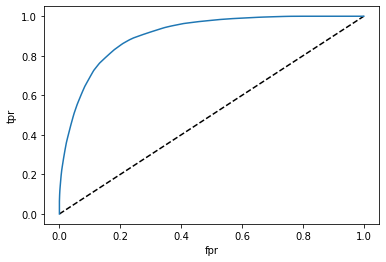

{'Accuracy': 0.8252911813643927,
 'Recall': 0.8555734190782422,
 'Precision': 0.7944762378701169,
 'F1 score': 0.8238936911366275,
 'AUC': 0.8265860234327747}

In [250]:
classification_eva(y_train,pred_train,probs=prob_train_1)

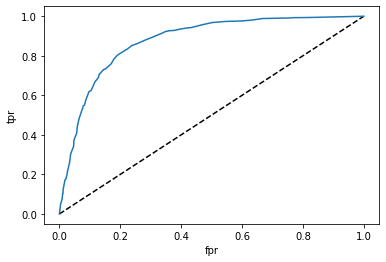

{'Accuracy': 0.8044192296207823,
 'Recall': 0.8265895953757225,
 'Precision': 0.7697368421052632,
 'F1 score': 0.7971508206875195,
 'AUC': 0.8058729226878613}

In [251]:
classification_eva(y_test,pred_test,probs=prob_test_1)

### Random Forest

In [84]:
x=bank1.drop(columns=['deposit'])
y=bank1['deposit']

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
print('Train Accuracy:',rf.score(x_train,y_train))
print('Test Accuracy:',rf.score(x_test,y_test))

Train Accuracy: 1.0
Test Accuracy: 0.8360704687966557


In [94]:
from sklearn.model_

SyntaxError: invalid syntax (3102465913.py, line 1)

In [ ]:
# params={'n_estimators':[100,150,200,250,300],
#        'criterion':['gini','entropy'],
#        'max_depth':[5,7,9,11,15,17],
#        'min_sample_split':[10,20,50,100,200],
#        'min_sample_leaf':[5,10,15,20,30,50],
#        'max_features':['sqrt','log2'],
#        'bootstrap'=[True,False]
#        }
# It will  take lot of time to estimate the result therefore reducing

In [95]:
import time
tic=time.time()

In [100]:
tic=time.time()
params={'n_estimators':[100,150,200],
       'criterion':['gini','entropy'],
       'max_depth':[7,9,11,15],
       'min_samples_split':[50,100,200],
       'min_samples_leaf':[5,10,15,20],
       'max_features':['sqrt','log2'],
       'bootstrap':[True]
       }
# 3*2*4*3*4*2*1*10=5760
rf1=RandomForestClassifier()
gs_rf=GridSearchCV(estimator=rf1, param_grid=params, cv=10, n_jobs=-1, verbose=1)
gs_rf.fit(x_train,y_train)
toc=time.time()
print("\n Total time taken",toc-tic)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits

 Total time taken 2438.099584579468


In [101]:
2438.09/60

40.63483333333333

In [102]:
rf1.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [103]:
gs_rf.best_score_

0.8339960245078937

In [104]:
gs_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [105]:
gs_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=50)

In [108]:
rff=RandomForestClassifier(n_estimators=100,
                           criterion='gini',
                           max_depth=15,
                           min_samples_leaf=5,
                           min_samples_split=50,
                           max_features='sqrt',
                           bootstrap=True)

In [109]:
rff.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=50)

In [110]:
print('Train Accuracy:',rff.score(x_train,y_train))
print('Test Accuracy:',rff.score(x_test,y_test))

Train Accuracy: 0.857161141686932
Test Accuracy: 0.8283069573006868


#### Feature importance

In [118]:
feat=pd.DataFrame({'Var':x_train.columns,'Imp':rff.feature_importances_}).sort_values(by='Imp',ascending=False)
feat

,Var,Imp
2,duration,0.487966
31,poutcome_success,0.073346
0,age,0.056996
17,housing_yes,0.048122
1,balance,0.047244
5,recent_pdays,0.045560
4,previous,0.034945
26,month_may,0.025257
3,campaign,0.022572
25,month_mar,0.021283


### Model Evaluation

In [113]:
pred_train=rff.predict(x_train)
pred_test=rff.predict(x_test)

In [114]:
prob_train_1=rff.predict_proba(x_train)[:,1]
prob_test_1=rff.predict_proba(x_test)[:,1]

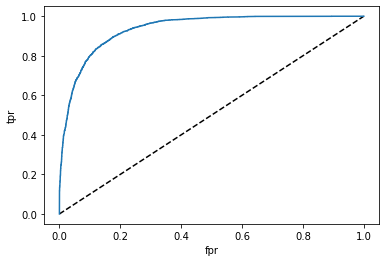

{'Accuracy': 0.857161141686932,
 'Recall': 0.8863879957127545,
 'Precision': 0.827,
 'F1 score': 0.8556647697878945,
 'AUC': 0.8584108564694622}

In [122]:
classification_eva(act=y_train,pred=pred_train,probs=prob_train_1)

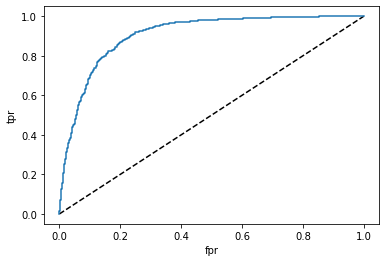

{'Accuracy': 0.8283069573006868,
 'Recall': 0.8464996788696211,
 'Precision': 0.7968561064087062,
 'F1 score': 0.8209280597944565,
 'AUC': 0.8294998394348105}

In [123]:
classification_eva(y_test,pred_test,probs=prob_test_1)